# Task 1 Story
---

Japan is located in earthquake-prone region, where earthquakes happen frequently compared to the rest of the world. In attempt to reduce the impact of the natural hazard on human lives and properties, Japan Earthquake Observatory (JEO), the government funded organization, is conducting a research on historical weather data, hoping to uncover hidden patterns in data. The ultimate goal of the research is to establish a robust model to forecast earthquakes by observing weather data in future. 

A group of experts from meteorology and data science are gathered to contirbute to the project.

After extensive discussions, the team agreed to structure the project into two stages, clustering and forecasting. Data scientists would apply clustering algorithms, in order to segment weather data and identify meaningful clusters. Then, the results would be applied in the second stage as labeled data for the forecasting.


# Task 2 The Data
---

1.  Data of 130 earthquake events in Japan region from 1973 to 2023 was collected from https://www.ngdc.noaa.gov/, consisting of date, time, latitude, longitude, earthquake depth and magnitude of the events.

    Source: https://www.ngdc.noaa.gov/  
    Timeframe: 50 years

2.  Historical weather data (hourly) 30 days before each earthquake (collected from source 1) was collected from https://open-meteo.com/, consisting of 26 features.

    Source: https://open-meteo.com/  
    Timeframe: 30 days before each earthquake (hourly)


    Features  

<img src='eq_features_02.png' width="1650" height="1067">

"30 days" period is an arbitrary choice that would not be too short to ensure patterns are captured and not be too long to increase number of noises and computation time in analysis. "Earthquake happened in Japan region" is to ensure the project result is Japan focus. The 26 weather features are all the general weather features suggested by the meteorologists and the website.

Therefore, the result generated from this dataset would be reliable for further usage of JEO.

# Task 3 IDA
---

The dataset 1 (Japan earthquake record) would not be presented in this notebook, since analysis would only be applied on dataset 2 (Weather data). For further information about dataset 1, please see the scrape-code file. 

In [1]:
# import packages
import pandas as pd
pd.options.display.max_columns = None

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
res = pd.read_csv('eq30days.csv')

In [3]:
# basic information checking
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95144 entries, 0 to 95143
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     95144 non-null  int64  
 1   time                           95144 non-null  object 
 2   temperature_2m                 95144 non-null  float64
 3   relativehumidity_2m            95144 non-null  int64  
 4   dewpoint_2m                    95144 non-null  float64
 5   rain                           95144 non-null  float64
 6   snowfall                       95144 non-null  float64
 7   pressure_msl                   95144 non-null  float64
 8   surface_pressure               95144 non-null  float64
 9   cloudcover                     95144 non-null  int64  
 10  cloudcover_low                 95144 non-null  int64  
 11  cloudcover_mid                 95144 non-null  int64  
 12  cloudcover_high                95144 non-null 

Dataset consists of 95144 instances with 31 features, 1 of them is object datatype (time) and the rest are all numbers datatype (either float or integer)

Number of null values are observed in 5 of the features, soil_temperature_28_to_100cm, soil_moisture_0_to_7cm, soil_moisture_7_to_28cm, soil_moisture_28_to_100cm, soil_moisture_100_to_255cm

A column "Unnamed: 0" is the original index to track scraping process. 

---

In [4]:
res.describe()

,Unnamed: 0,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,latitude,longitude,eqDepth,eqMagnitude
count,95144.000000,95144.000000,95144.000000,95144.000000,95144.00000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,95144.000000,94007.000000,95144.000000,93959.000000,93959.000000,93959.000000,93959.000000,95144.000000,95144.000000,95144.000000,95144.000000
mean,365.470623,14.960963,77.147923,10.797154,0.19052,0.005445,1014.126458,1004.350868,52.855503,33.453239,31.058953,39.864984,0.111970,0.406101,19.091771,24.315520,182.406226,182.502386,31.984467,16.152269,16.066642,15.912326,16.041059,0.180837,0.182914,0.183268,0.191579,35.814201,139.065117,34.727329,6.501365
std,211.331308,8.451191,13.916349,9.353161,0.70526,0.059662,6.870075,27.835340,36.014886,35.477003,36.458354,43.665621,0.127075,0.297948,13.107667,15.363158,103.805246,103.411331,17.537693,7.796207,7.580585,7.083526,6.797707,0.195061,0.197087,0.197647,0.205337,4.176240,4.362765,64.013754,0.759561
min,0.000000,-20.200000,24.000000,-22.300000,0.00000,0.000000,962.100000,857.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000,-6.300000,-1.500000,0.700000,1.100000,0.000000,0.000000,0.000000,0.000000,22.013000,124.090000,2.000000,4.600000
25%,182.000000,8.400000,67.000000,3.400000,0.00000,0.000000,1009.700000,1005.900000,21.000000,2.000000,0.000000,0.000000,0.020000,0.190000,8.600000,12.500000,88.000000,88.000000,18.700000,9.900000,9.900000,10.000000,10.600000,0.000000,0.000000,0.000000,0.000000,33.807000,137.488000,10.000000,6.000000
50%,365.000000,15.800000,79.000000,11.800000,0.00000,0.000000,1014.000000,1011.800000,50.000000,19.000000,13.000000,13.000000,0.060000,0.340000,16.200000,21.500000,190.000000,192.000000,28.800000,16.800000,16.800000,16.200000,15.500000,0.000000,0.000000,0.000000,0.000000,35.500000,139.902000,20.000000,6.600000
75%,548.000000,21.800000,88.000000,18.600000,0.00000,0.000000,1018.600000,1016.900000,91.000000,60.000000,59.000000,95.000000,0.160000,0.560000,27.000000,33.100000,275.000000,273.000000,41.400000,22.100000,21.900000,21.600000,21.200000,0.388000,0.392000,0.393000,0.401000,38.432000,142.028000,39.000000,7.000000
max,743.000000,34.400000,100.000000,28.100000,18.50000,3.780000,1037.000000,1037.000000,100.000000,100.000000,100.000000,100.000000,0.810000,3.260000,107.700000,149.000000,360.000000,360.000000,176.800000,32.100000,29.800000,29.800000,29.800000,0.520000,0.520000,0.520000,0.519000,44.119000,145.800000,664.000000,9.100000


Mean values of the features are not close that et0_fao_evapotranspiration, vapor_pressure_deficit and soil moistures are close to 0 to 1 but most of other features have mean values 10 to 30, even over 1000 in pressures. This range difference suggests standardization would be recommended before further analysis.  

At least 75% of "rain" and "snowfall" are 0 and at least 50% of the three "soil moisture" are 0

---

Distribution plot for all numeric features

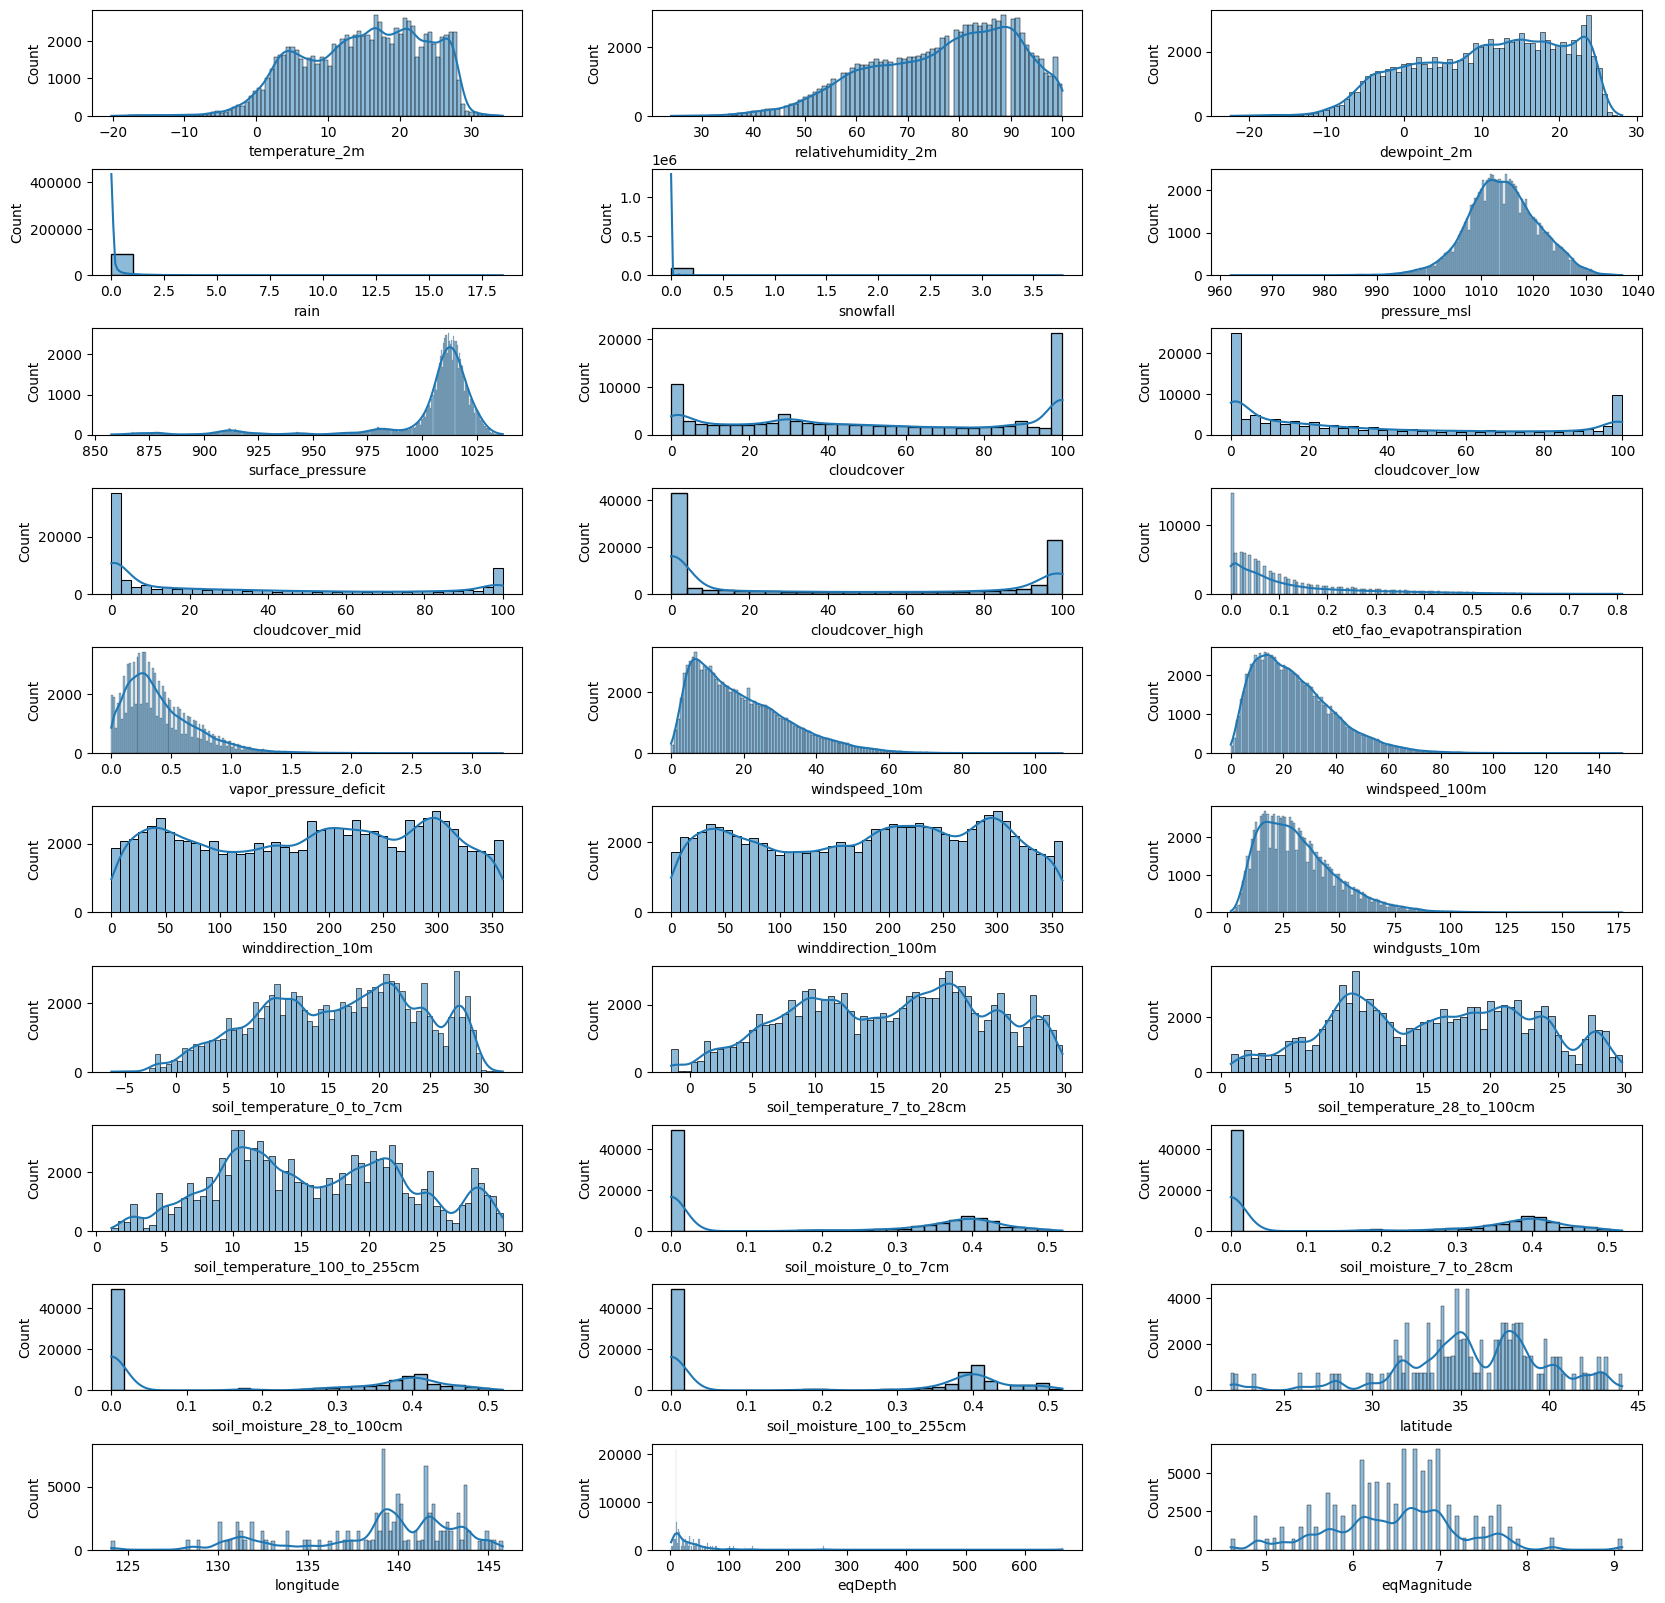

In [5]:
# distribution plot
fig, axe = plt.subplots(10, 3, figsize=(20, 20))
axes = axe.ravel()

for i, col in enumerate(res.columns[2:]):
    sns.histplot(res[col], kde=True, ax=axes[i])

plt.subplots_adjust(wspace=0.3,
                    hspace=0.5)

Row 5, Column 1, 2, & 3 vapor_pressure_deficit, windspeed_10m and 100m + Row 4 & 6, Column 3 evapotranspiration and windgusts_10m are right skewed  
Row 6, Column 1 & 2: Wind direction data is relatively evenly distributed  
Row 2, Column 3 and Row 3, Column 1: two pressures have rough bell shape, centered around value 1000  
Row 3, Column 2 & 3 and Row 4, Column 1 & 2: Cloudcover have extreme value count in 0 and 100 and rest counts are even.  
Row 8 and Row 9: Soil moisture are mostly 0 with similar bell shape in around 0.4.

---
# Task 4 EDA and Preprocessing
---

In this section a column is renamed, two events are dropped to deal with the null value in columns discussed in previous section. (The missing values are both from the two events happened in 2023 that the dataset in website is not updated in time.), and standardization is applied.

In [6]:
# Checking the missing values
# the missing values are from two events

res[(res["soil_temperature_28_to_100cm"].isnull()) |
    (res["soil_moisture_0_to_7cm"].isnull()) |
    (res["soil_moisture_7_to_28cm"].isnull()) |
    (res["soil_moisture_28_to_100cm"].isnull()) |
    (res["soil_moisture_100_to_255cm"].isnull())]

,Unnamed: 0,time,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,latitude,longitude,eqDepth,eqMagnitude
93856,175,2023-09-12 07:00:00,27.8,65,20.6,0.0,0.0,1009.7,1009.7,7,7,0,2,0.18,1.29,18.8,20.3,83,83,23.4,28.9,28.9,NaN,28.9,NaN,NaN,NaN,NaN,29.940,139.950,10,6.1
93857,176,2023-09-12 08:00:00,27.8,65,20.5,0.0,0.0,1010.2,1010.2,10,11,0,0,0.30,1.32,18.2,19.7,81,82,22.7,28.9,28.9,NaN,28.9,NaN,NaN,NaN,NaN,29.940,139.950,10,6.1
93858,177,2023-09-12 09:00:00,28.0,64,20.5,0.0,0.0,1010.3,1010.3,22,24,0,0,0.41,1.36,17.3,18.4,78,78,22.3,28.9,28.9,NaN,28.9,NaN,NaN,NaN,NaN,29.940,139.950,10,6.1
93859,178,2023-09-12 10:00:00,28.0,65,20.8,0.0,0.0,1010.1,1010.1,8,9,0,0,0.51,1.32,15.7,16.4,70,71,21.2,28.9,28.9,NaN,28.9,NaN,NaN,NaN,NaN,29.940,139.950,10,6.1
93860,179,2023-09-12 11:00:00,27.9,69,21.6,0.0,0.0,1010.1,1010.1,25,23,7,0,0.56,1.17,15.0,16.1,60,61,20.2,28.9,28.9,NaN,28.9,NaN,NaN,NaN,NaN,29.940,139.950,10,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,736,2023-10-08 16:00:00,27.3,55,17.5,0.0,0.0,1018.2,1018.2,60,57,15,0,0.27,1.62,20.1,21.9,126,126,27.4,27.6,27.8,NaN,27.8,NaN,NaN,NaN,NaN,29.707,139.902,10,4.9
95140,737,2023-10-08 17:00:00,27.5,55,17.5,0.0,0.0,1018.3,1018.3,69,55,31,4,0.19,1.65,21.8,23.8,128,128,29.2,27.6,27.8,NaN,27.8,NaN,NaN,NaN,NaN,29.707,139.902,10,4.9
95141,738,2023-10-08 18:00:00,27.5,55,17.8,0.0,0.0,1018.6,1018.6,46,32,19,18,0.18,1.64,23.7,26.0,132,132,31.7,27.6,27.8,NaN,27.8,NaN,NaN,NaN,NaN,29.707,139.902,10,4.9
95142,739,2023-10-08 19:00:00,27.6,58,18.5,0.0,0.0,1018.5,1018.5,17,0,9,39,0.12,1.56,17.9,19.4,146,145,33.5,27.6,27.6,NaN,27.6,NaN,NaN,NaN,NaN,29.707,139.902,10,4.9


In [7]:
# rename index columns
res.rename(columns={'Unnamed: 0':'original_index'}, inplace=True)

# drop na
res = res[(res['latitude']!=29.940) & (res['latitude']!=29.707)]

res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93681 entries, 0 to 93680
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   original_index                 93681 non-null  int64  
 1   time                           93681 non-null  object 
 2   temperature_2m                 93681 non-null  float64
 3   relativehumidity_2m            93681 non-null  int64  
 4   dewpoint_2m                    93681 non-null  float64
 5   rain                           93681 non-null  float64
 6   snowfall                       93681 non-null  float64
 7   pressure_msl                   93681 non-null  float64
 8   surface_pressure               93681 non-null  float64
 9   cloudcover                     93681 non-null  int64  
 10  cloudcover_low                 93681 non-null  int64  
 11  cloudcover_mid                 93681 non-null  int64  
 12  cloudcover_high                93681 non-null 

Preprocessing - Standardization  
26 Features are fit to standardization in order to avoid any of dominant effect by any feature on further PCA. 

In [8]:
# Standardization 

from sklearn.preprocessing import StandardScaler

scaler_01 = StandardScaler()
sc_01 = scaler_01.fit_transform(res.iloc[:, 2:-4])

res_sc = res.copy()
res_sc[res_sc.columns[2:-4]] = sc_01
res_sc.describe()

,original_index,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,latitude,longitude,eqDepth,eqMagnitude
count,93681.000000,9.368100e+04,9.368100e+04,93681.000000,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,9.368100e+04,93681.000000,93681.000000,93681.000000,93681.000000
mean,365.473106,9.223001e-17,-4.223164e-16,0.000000,-1.274230e-17,-4.672178e-17,1.168894e-14,-2.427106e-18,7.281317e-18,1.031520e-16,-1.183214e-17,-4.004724e-17,2.912527e-17,-1.213553e-18,-8.009448e-17,-1.140740e-16,-9.708422e-18,1.213553e-16,-2.839713e-16,4.635772e-16,2.427106e-18,-1.213553e-16,3.640658e-17,-2.548461e-16,-1.698974e-17,2.451377e-16,1.601890e-16,35.907780,139.051677,35.113492,6.517125
std,211.332226,1.000005e+00,1.000005e+00,1.000005,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,4.140487,4.395363,64.436461,0.751112
min,0.000000,-4.178776e+00,-3.795380e+00,-3.543893,-2.697163e-01,-9.198263e-02,-7.528790e+00,-5.230777e+00,-1.476174e+00,-9.465626e-01,-8.567740e-01,-9.144643e-01,-8.803651e-01,-1.355844e+00,-1.451635e+00,-1.581586e+00,-1.758259e+00,-1.765930e+00,-1.720497e+00,-2.893590e+00,-2.326079e+00,-2.150023e+00,-2.214722e+00,-9.296453e-01,-9.306618e-01,-9.298182e-01,-9.355958e-01,22.013000,124.090000,2.000000,4.600000
25%,182.000000,-7.845165e-01,-7.224260e-01,-0.786015,-2.697163e-01,-9.198263e-02,-6.437036e-01,5.272848e-02,-8.655946e-01,-8.904164e-01,-8.567740e-01,-9.144643e-01,-7.217686e-01,-7.130152e-01,-7.981806e-01,-7.707083e-01,-9.126914e-01,-9.171078e-01,-7.603897e-01,-7.870697e-01,-8.124866e-01,-8.458878e-01,-7.873024e-01,-9.296453e-01,-9.306618e-01,-9.298182e-01,-9.355958e-01,33.826000,137.305000,10.000000,6.100000
50%,365.000000,9.990326e-02,1.351425e-01,0.108141,-2.697163e-01,-9.198263e-02,-2.173152e-02,2.703475e-01,-8.849333e-02,-4.131740e-01,-5.013698e-01,-6.171240e-01,-4.045757e-01,-2.393518e-01,-2.207096e-01,-1.803895e-01,8.661619e-02,9.569166e-02,-1.865978e-01,8.414563e-02,8.495315e-02,3.298570e-02,-9.613085e-02,-9.296453e-01,-9.306618e-01,-9.298182e-01,-9.355958e-01,35.789000,139.871000,22.000000,6.600000
75%,548.000000,8.050488e-01,7.783188e-01,0.829930,-2.697163e-01,-9.198263e-02,6.580984e-01,4.558589e-01,1.077159e+00,7.658956e-01,7.835531e-01,1.258407e+00,3.884065e-01,5.049764e-01,5.999073e-01,5.721048e-01,8.841405e-01,8.769941e-01,5.519462e-01,7.863192e-01,7.814736e-01,7.984562e-01,7.903718e-01,1.059076e+00,1.057918e+00,1.058181e+00,1.016935e+00,38.432000,142.028000,40.000000,7.000000
max,743.000000,2.346808e+00,1.635887e+00,1.885680,2.595131e+01,6.278051e+01,3.305096e+00,1.169364e+00,1.299187e+00,1.860746e+00,1.877104e+00,1.372769e+00,5.542791e+00,9.673747e+00,6.731738e+00,8.084074e+00,1.700882e+00,1.706525e+00,8.221442e+00,2.099644e+00,1.866438e+00,1.975013e+00,2.097587e+00,1.735651e+00,1.707250e+00,1.700613e+00,1.591496e+00,44.119000,145.800000,664.000000,9.100000


---
# Task 5 Dimensionality Reduction
---

In this section, PCA is applied in attempt to reduce the number of dimensions before clusterings.

Preprocessing - Covariance check  
Check covariances between features to ensure there is intrinsic relationship among the features. Since most of the covariances are not zero, PCA would be conducted.

PCA -- Results  
80% is set to be the threshold of selecting the number of components. 7 components are sufficient to explained over 85% of the variance.

In [9]:
# Preprocessing 2 - Covariance check  
res_sc.iloc[:, 2:-4].cov()

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
temperature_2m,1.000011,0.258723,0.953294,0.077841,-0.152307,-0.328235,0.038871,0.011829,-0.041426,-0.089308,0.232099,0.344787,0.485059,-0.067264,-0.090957,-0.213370,-0.212925,-0.154510,0.949551,0.926366,0.892168,0.769080,-0.149430,-0.144962,-0.142082,-0.130316
relativehumidity_2m,0.258723,1.000011,0.536337,0.229019,0.037128,-0.346467,-0.189746,0.290323,0.261262,0.151222,0.271037,-0.344623,-0.627457,-0.155915,-0.089250,-0.147417,-0.148336,-0.206137,0.182336,0.231148,0.208239,0.151427,0.028819,0.015487,0.011237,0.007167
dewpoint_2m,0.953294,0.536337,1.000011,0.136542,-0.122879,-0.394240,-0.017096,0.098712,0.041986,-0.032091,0.285721,0.190401,0.224990,-0.099435,-0.100621,-0.232275,-0.232055,-0.193624,0.887833,0.883841,0.847406,0.722982,-0.128615,-0.128855,-0.127624,-0.118748
rain,0.077841,0.229019,0.136542,1.000011,0.009805,-0.223026,-0.051101,0.297081,0.254877,0.372556,0.220819,-0.113555,-0.154542,0.120188,0.151948,-0.084430,-0.085072,0.193222,0.071649,0.075717,0.071368,0.057604,0.038461,0.026909,0.017400,0.015398
snowfall,-0.152307,0.037128,-0.122879,0.009805,1.000011,-0.059829,-0.014641,0.073437,0.070413,0.114018,-0.004193,-0.056382,-0.089915,0.090868,0.102941,-0.002182,-0.004785,0.129995,-0.126764,-0.123081,-0.116522,-0.094078,0.005138,0.004070,0.002639,-0.000955
pressure_msl,-0.328235,-0.346467,-0.394240,-0.223026,-0.059829,1.000011,0.202332,-0.150388,-0.077246,-0.158617,-0.160752,-0.047394,0.054259,-0.225731,-0.266801,-0.047877,-0.055814,-0.241460,-0.308844,-0.295919,-0.240976,-0.127333,0.107843,0.113843,0.122028,0.114542
surface_pressure,0.038871,-0.189746,-0.017096,-0.051101,-0.014641,0.202332,1.000011,-0.094716,-0.090594,-0.034015,-0.052220,0.025946,0.128506,0.247219,0.195970,-0.074268,-0.063980,0.054091,0.091887,0.100764,0.143191,0.226722,-0.341006,-0.336525,-0.334690,-0.342498
cloudcover,0.011829,0.290323,0.098712,0.297081,0.073437,-0.150388,-0.094716,1.000011,0.776182,0.699539,0.468209,-0.200652,-0.257826,0.062173,0.073863,-0.145700,-0.147756,0.112278,0.011684,0.011670,-0.006988,-0.045957,0.079132,0.066215,0.056311,0.052975
cloudcover_low,-0.041426,0.261262,0.041986,0.254877,0.070413,-0.077246,-0.090594,0.776182,1.000011,0.330242,0.098461,-0.165257,-0.258605,0.062836,0.065289,-0.136703,-0.140197,0.121776,-0.026729,-0.021932,-0.033266,-0.063421,0.077248,0.064216,0.052889,0.048873
cloudcover_mid,-0.089308,0.151222,-0.032091,0.372556,0.114018,-0.158617,-0.034015,0.699539,0.330242,1.000011,0.322731,-0.196891,-0.204268,0.107378,0.128277,-0.087058,-0.088114,0.161414,-0.084374,-0.084383,-0.089578,-0.093437,0.075533,0.063366,0.055560,0.051812


In [10]:
# The following table shows number of "absolute value" in each feature close to zero

cov_check = pd.DataFrame()

distance_from_zero = [0.01, 0.05, 0.10]

for dist in distance_from_zero:
    cov_check = pd.concat([cov_check, (np.absolute(res_sc.iloc[:, 2:-4].cov()) < dist ).sum()], axis=1)

cov_check.columns = distance_from_zero
cov_check

,0.01,0.05,0.10
temperature_2m,0,3,7
relativehumidity_2m,1,5,6
dewpoint_2m,0,3,5
rain,1,5,13
snowfall,8,10,17
pressure_msl,0,2,6
surface_pressure,0,5,13
cloudcover,1,5,14
cloudcover_low,0,6,16
cloudcover_mid,0,2,13



In "0.01" column, which shows the number of "absolute covariance values" smaller than 0.01, "snowfall" contains most of the "close to zero covariance" against other features, followed by "winddirection_10m" which has 4, and "evapotranspiration" and "windspeed_100m" which have 3. 

Besides, in "0.05", number of "absolute covariance values" smaller than 0.05, all of the features have certain amount, ranging from 2 to 10.

In the last column, which shows number of "absolute covariance values" smaller than 0.10, 17 features among 26 features have two-digit number of "absolute covariance values", ranging from 11 to 17, and the remaining 9 features have values ranging from 5 to 8.

---
Although the covariance are nither all or mostly far away from zero, nor all or mostly close to zero, certain intrinsic relationship in features is reflected only that the relationship might not be very strong. 
In addition, if no pca application before clustering, 26 features directly input to clustering algorithms would affect the model performance. Therefore, it is still worth trying to conduct pca. 

In [11]:
from pca import pca

pca_model = pca(n_components=0.8)
results = pca_model.fit_transform(res_sc.iloc[:, 2:-4])

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [26] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [7] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [26] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


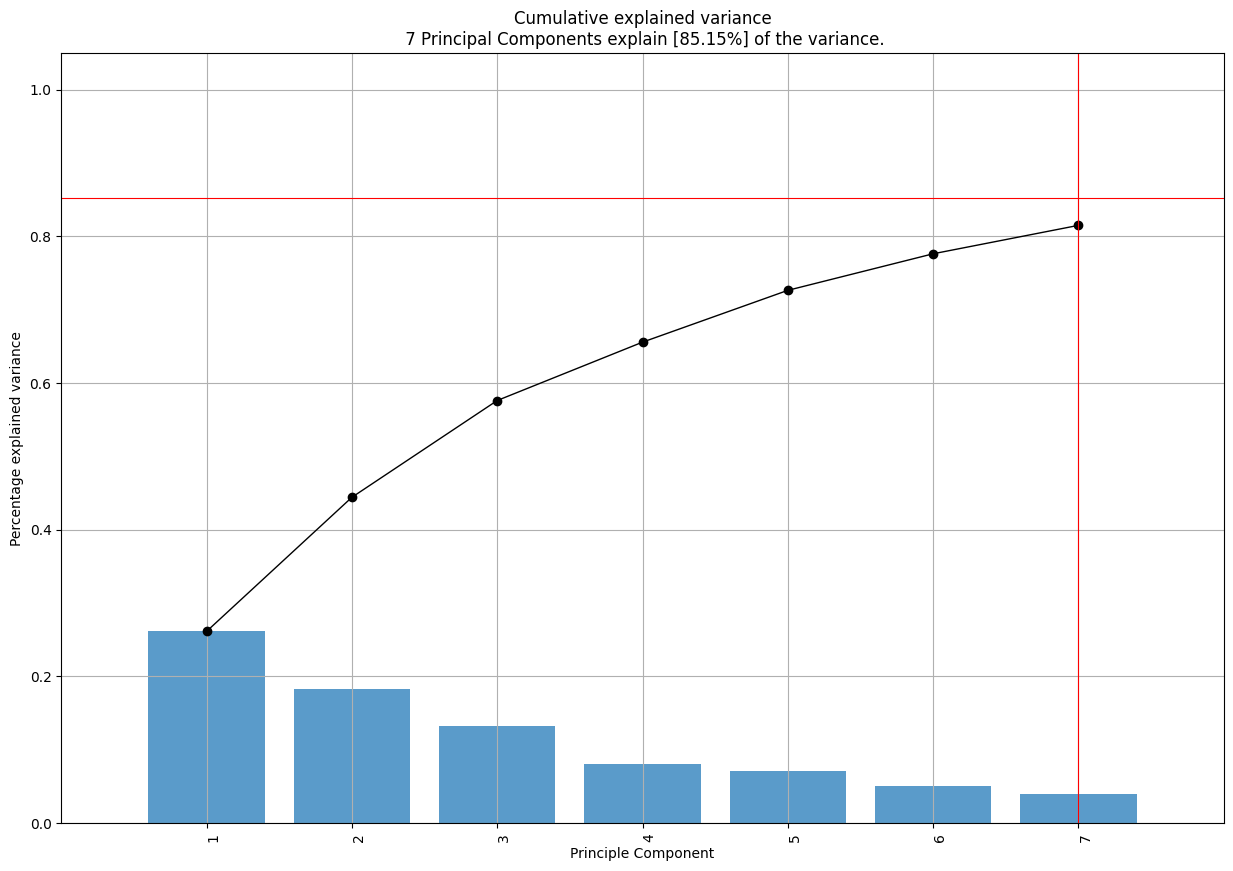

In [12]:
fig, ax = pca_model.plot(n_components=7)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


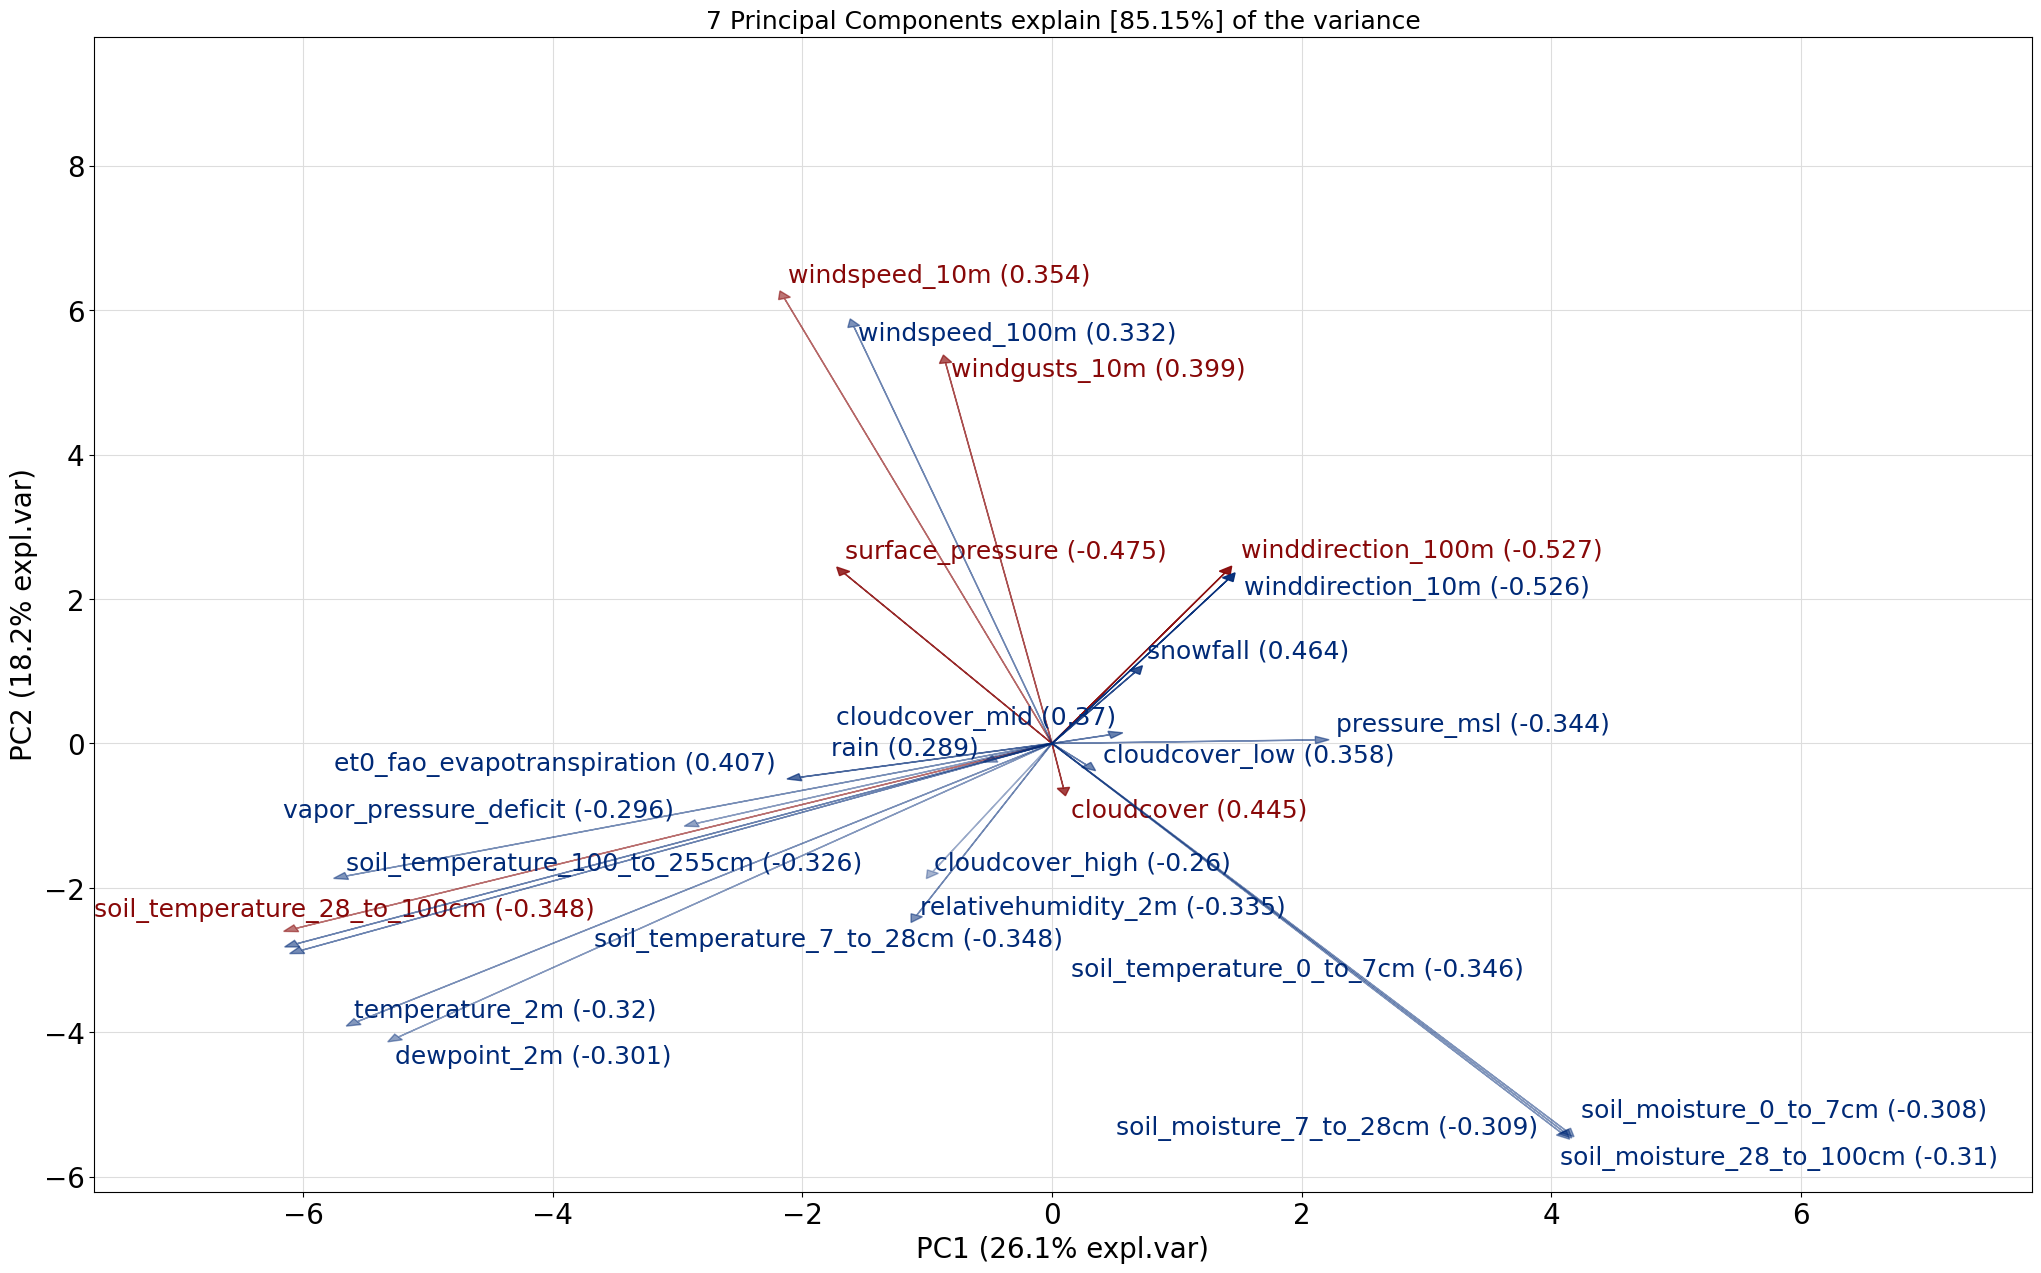

In [13]:
fig, ax = pca_model.biplot(cmap=None, legend=False)

According to the biplot above, temperature related features "temperature", "soil_temperature" and "dewpoint" has the most effect in first component, which is indicated by the relatively longer length against PC1.  
PC1 would be a component highly related to the temperature. (Except soil_temperature_0_to_7cm)

PC2 would be a better indicator to explain windspeed and soil moisture.

Other features with shorter vector in the figure above do not always implied the features are trivial. For example, "cloudcover (0.445)" has most effect in PC3. The limitation of the 2-D biplot ignored the effect of features in other dimensions.

Red color labels implied such features have the most effect on corresponding principal components. 
The angles between features reflect the correlation negatively, the smaller the angle, the higher correlation between features. For instances, temperature related features have smaller angles among each other, so they are classified as highly correlated features. Soil moistures are not closely related to wind speeds, as the angles between them are large.

In [14]:
results['loadings']

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
PC1,-0.319966,-0.063899,-0.301151,-0.031345,0.040997,0.125636,-0.097580,0.006096,0.019773,0.032098,-0.056956,-0.120143,-0.166742,-0.123320,-0.091478,0.082985,0.081451,-0.049236,-0.345613,-0.347879,-0.348334,-0.325690,0.236653,0.235687,0.234678,0.232188
PC2,-0.221347,-0.140202,-0.233687,-0.014671,0.060834,0.002884,0.138117,-0.040961,-0.021335,0.008337,-0.105845,-0.027841,-0.064782,0.354386,0.332477,0.133577,0.138828,0.304170,-0.164586,-0.159386,-0.147181,-0.105690,-0.307988,-0.308975,-0.309940,-0.312866
PC3,-0.012880,0.318375,0.087619,0.288840,0.086680,-0.202474,-0.085743,0.444859,0.357915,0.369942,0.252348,-0.228638,-0.296168,0.114410,0.145778,-0.119345,-0.119755,0.139513,-0.020179,-0.004904,-0.016080,-0.036385,0.020664,0.011003,0.004604,0.001349
PC4,0.099536,-0.214848,0.018335,0.123935,0.039748,-0.234046,-0.157268,0.021533,0.002392,0.074514,-0.033084,0.244460,0.271718,0.260303,0.301192,0.254036,0.249193,0.399366,0.104884,0.070279,0.051438,0.014647,0.245132,0.247501,0.245385,0.247950
PC5,-0.049618,-0.335230,-0.147682,0.016434,0.046475,0.256508,0.204700,0.108567,0.106891,0.117648,-0.004463,0.168768,0.279750,0.113259,0.087999,-0.525699,-0.526917,0.130546,-0.027676,-0.044176,-0.019275,0.023747,0.055674,0.059169,0.062272,0.060479
PC6,-0.013231,0.298901,0.084220,-0.011241,0.132586,-0.229730,-0.141632,-0.392848,-0.231002,-0.324280,-0.259758,-0.197725,-0.249393,0.169315,0.234605,-0.298413,-0.299593,0.185639,-0.034349,0.002139,0.008130,0.017895,0.090632,0.089911,0.092060,0.088964
PC7,0.015175,-0.023597,-0.000577,-0.136085,0.463939,-0.343787,-0.474862,0.018362,-0.076229,0.024865,0.183012,0.406888,0.129085,-0.116297,-0.130129,-0.117008,-0.109837,-0.072926,-0.027259,-0.081209,-0.137671,-0.230009,-0.125651,-0.124234,-0.122789,-0.110748


The loading score table shows the effect of features in each of the 7 components. The sign shows the direction of effect and the absolute value shows the magnitude. A value closer to zero means smaller effect.

---
# Task 6 Clustering + Task 7 Cluster Interpretation
---

Since there is no obvious evidence that the clusters are in spherical shapes, the cluster shapes are more likely to be irregular shapes. Secondly, data was collected in an arbitrary time frame and certain amount of noises are expected in the dataset. OPTICS would be the conducted, in order to identify noises, extract most dense clusters and observe the structure of the clustering.

As the domain knowledge in Weather expert team does not have particular concerns about the hyperparameters in data science algorithms, a few arbitrary choices are selected at the beginning of the clustering. Three min_samples, 100, 150 & 200 are applied to the testing. 

The reasons for applying three choices of minimum samples is to compare the results of the clusterings to reduce the effect of clustering error or assertiveness. Secondly, the clustering performance evaluation is difficult as reliable evaluation metric is suggested. For example, silhouette scores would not be suggested since the detected noises by the OPTICS/DBSCAN would negatively affect the silhouette score. Therefore 3 clusterings are performed to compare the performances. The values are arbitrary based on data scientists past experience on this amount of instances. 

In [15]:
# Adding PCA features to dataset
# column name are PCA01, PCA02, ...PCA07
# apply Matrix multiplication in 26 features for all instances and the loading scores

li_pca = ["PCA0" + str(s) for s in range(1, 8)]
res_sc[li_pca] = np.matmul(res_sc.iloc[:, 2:-4].values, results['loadings'].T)

OPTICS function is applied with the three minimum samples to conduct the first clustering.

In [16]:
# Function for OPTICS model

from sklearn.cluster import OPTICS

def optics_result(df, min_samples):
    """

    Fitting data value and return cluster indexes and number of instances in each clusters
    Printing the result of clustering
    
    """

    # Fitting 
    optics_pca = OPTICS(min_samples=min_samples)
    clustering = optics_pca.fit(df)

    # cluster indexes and number of instances in each clusters
    uni, v_counts = np.unique(clustering.labels_, return_counts=True)

    # Printing the result of clustering
    print(f'Minimum samples: {min_samples}')
    print(f'Number of cluster: {len(uni)}')
    print(f'Clusters index: {uni}')
    print(f'Number of instances in corresponding cluster: {v_counts}')
    print("")
    
    return clustering

In [17]:
# Applying function with three different minimum samples, 100, 150 and 200

df = res_sc[li_pca]

clustering_100 = optics_result(df, 100)
clustering_150 = optics_result(df, 150)
clustering_200 = optics_result(df, 200)

Minimum samples: 100
Number of cluster: 1
Clusters index: [0]
Number of instances in corresponding cluster: [93681]

Minimum samples: 150
Number of cluster: 1
Clusters index: [0]
Number of instances in corresponding cluster: [93681]

Minimum samples: 200
Number of cluster: 1
Clusters index: [0]
Number of instances in corresponding cluster: [93681]



One cluster is return in each of all three min_samples. The result would be meaningless for further analysis.
So reachability graph is plotted to observe the "cluster structures" in order to learn more information for further analysis.

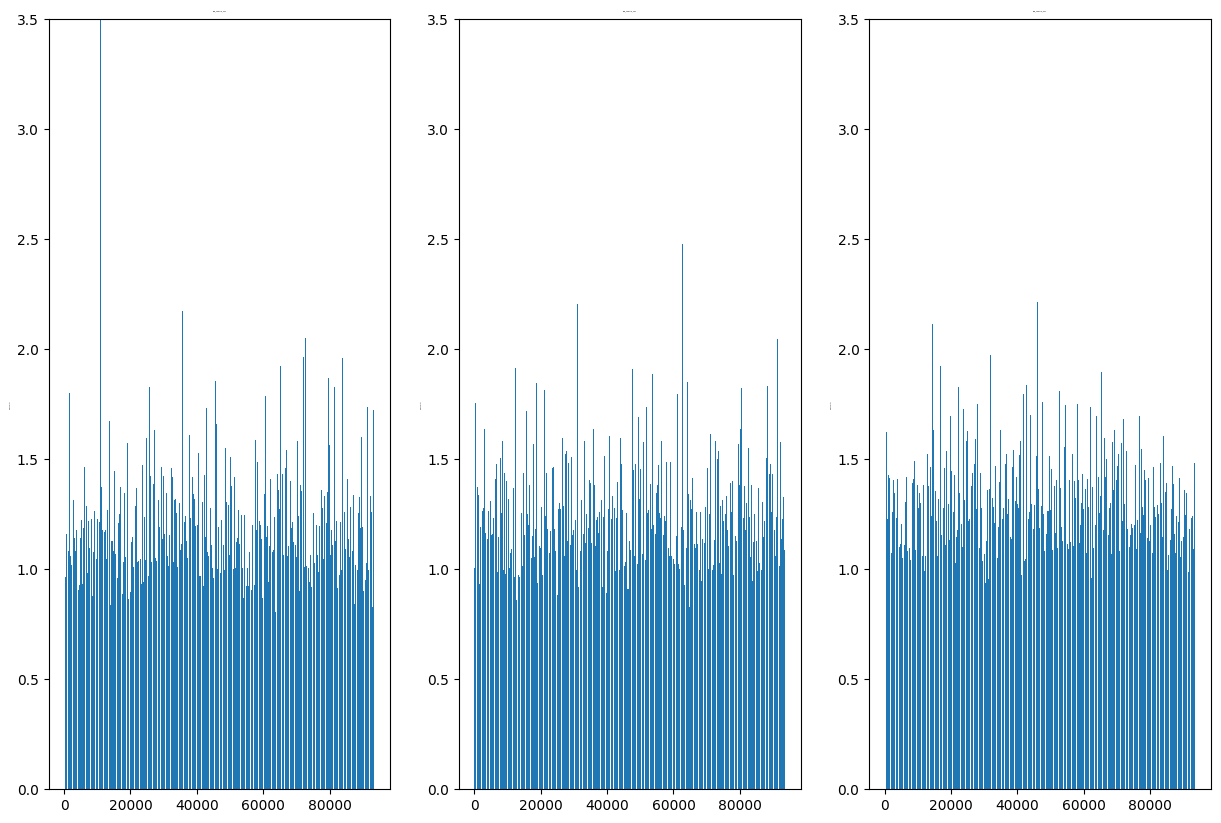

In [18]:
# Three reachability plots
title = ["min_sample_100", "min_sample_150", "min_sample_200"]

fig, axs = plt.subplots(1, 3, figsize=(15, 10))
axe = axs.ravel()

for i, clustering in enumerate([clustering_100, clustering_150, clustering_200]):
    axe[i].bar(clustering.ordering_, clustering.reachability_)
    axe[i].tick_params(axis='both', labelsize=10)
    axe[i].set_ylim(0, 3.5)
    axe[i].title.set_text(title[i])
    axe[i].set(ylabel="Reachability")

Some clusters are observed in high eps. The reason for "one cluster" return could be less sensitive in "xi" or other criteria are not met. Instead of fine-tune hyperparameter in OPTICS, another extraction method is applied to the current OPTICS clustering results, in order to save the computation time. 

---
DBSCAN based on the results of OPTICS is applied. "reachability", "core_distances", and "ordering" of the instances measured by OPTICS would be fit to "cluster_optics_dbscan" model, in order to find the suitable "eps" for further analysis. The model begins with eps=0.1 and adding 0.1 in each loop. The first clustering return more than 1 cluster would be the break point of the loop and the corresponding eps would be selected. 

In [19]:
# Function to find the suitable eps for further analysis

from sklearn.cluster import cluster_optics_dbscan

def dbscan_result_optics_based(optics_clustering):

    # for loop to try value of eps from 0.1 to 1.0
    for eps in range(1, 11):
        
        # OPTICS based dbscan extraction function with prarameters from previous OPTICS clustering
        labels = cluster_optics_dbscan(
                reachability=optics_clustering.reachability_,
                core_distances=optics_clustering.core_distances_,
                ordering=optics_clustering.ordering_,
                eps=eps/10
            )

        # record the index of clusters and number of instances in each clusters
        ind, num = np.unique(labels, return_counts=True)

        # printi statement to track the clustering
        print(f'Eps:{eps/10}, Index of clusters: {ind} and number of instances in corresponding clusters: {num}')

        # for loop is break if the clustering return more than one cluster
        if len(ind)>2:
            break
    
    # return the labels of clustering
    return labels
    

Applying the function to the three OPTICS results in three different minimum samples 100, 150, and 200.  

The results below show that eps values equal to 0.8, 0.9, and 1.0 would be the first clustering results with more than one cluster in the cases of minimum samples equal to 100, 150, and 200.

In [20]:
labels_100 = dbscan_result_optics_based(clustering_100)

Eps:0.1, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.2, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.3, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.4, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.5, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.6, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.7, Index of clusters: [-1  0] and number of instances in corresponding clusters: [93667    14]
Eps:0.8, Index of clusters: [-1  0  1  2  3  4] and number of instances in corresponding clusters: [92705   120   254   218   375     9]


In [21]:
labels_150 = dbscan_result_optics_based(clustering_150)

Eps:0.1, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.2, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.3, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.4, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.5, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.6, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.7, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.8, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.9, Index of clusters: [-1  0  1  2] and number of instances in corresponding clusters: [92192   332   309   848]


In [22]:
labels_200 = dbscan_result_optics_based(clustering_200)

Eps:0.1, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.2, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.3, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.4, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.5, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.6, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.7, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.8, Index of clusters: [-1] and number of instances in corresponding clusters: [93681]
Eps:0.9, Index of clusters: [-1  0] and number of instances in corresponding clusters: [93602    79]
Eps:1.0, Index of clusters: [-1  0  1  2] and number of instances in corresponding clusters: [90684   374  1910   713]


---
Based on the result from OPTICS with DBSCAN be the extraction method, meaningful results are generated. 

With eps=0.8 and minimum sample=100, 5 clusters are extracted.  
With eps=0.9 and minimum sample=150, 3 clusters are extracted.  
With eps=1.0 and minimum sample=200, 3 clusters are extracted.

In [23]:
# insert the clustering labels to dataframe
res_sc_copy = res_sc.copy()
res_sc_copy['optics_label_100'] = labels_100
res_sc_copy['optics_label_150'] = labels_150
res_sc_copy['optics_label_200'] = labels_200

---
The following will present the 3 clustering results with different minimum samples and eps in combinations of the 7 PCA dimensions, followed by tables presenting the mean values of features in each cluster.

In [24]:
import itertools

def pca_comb_plot(labels, colname):

    """
    create dataframe without "noise" instances
    plot clsutering results with specific color order
    """

    # drop all "noise" detected in OPTICS
    res_optics_dbscan = res_sc_copy[res_sc_copy[colname]!= -1]
    res_optics_dbscan.reset_index(inplace=True)

    # set color order easier to track the clusters 
    color_name = ['green', 'gold', 'deepskyblue',
                  'turquoise', 'red', 'pink', 'cyan']

    # subplots function
    fig, axs = plt.subplots(7, 3, figsize=(15, 15))
    axe = axs.ravel()

    # generate column name
    # calculate the number of clusters
    li_pca = ["PCA0" + str(s) for s in range(1, 8)]
    num_clusters = len(np.unique(labels))

    # loop of the different combination of PCA dimensions
    # loop to plot each cluster with specific color order
    for i, com in enumerate(itertools.combinations(li_pca, 2)):
        for j in range(num_clusters):
            axe[i].scatter(res_optics_dbscan[res_optics_dbscan[colname]==j][com[0]], res_optics_dbscan[res_optics_dbscan[colname]==j][com[1]], c=color_name[j])
            axe[i].set_xlabel(com[0], fontsize=10)
            axe[i].set_ylabel(com[1], fontsize=10)
            axe[i].tick_params(axis='both', labelsize=5)
    
    plt.subplots_adjust(wspace=0.3,
                        hspace=0.5)

    return res_optics_dbscan

In the following clustering, eps=0.8 and minimum sample=100, "green" and "red" clusters are clearly separated from the rest of other clusters. The "gold", "turquoise" and "deepskyblue" clusters are always closely stick to each other in all dimensions. 

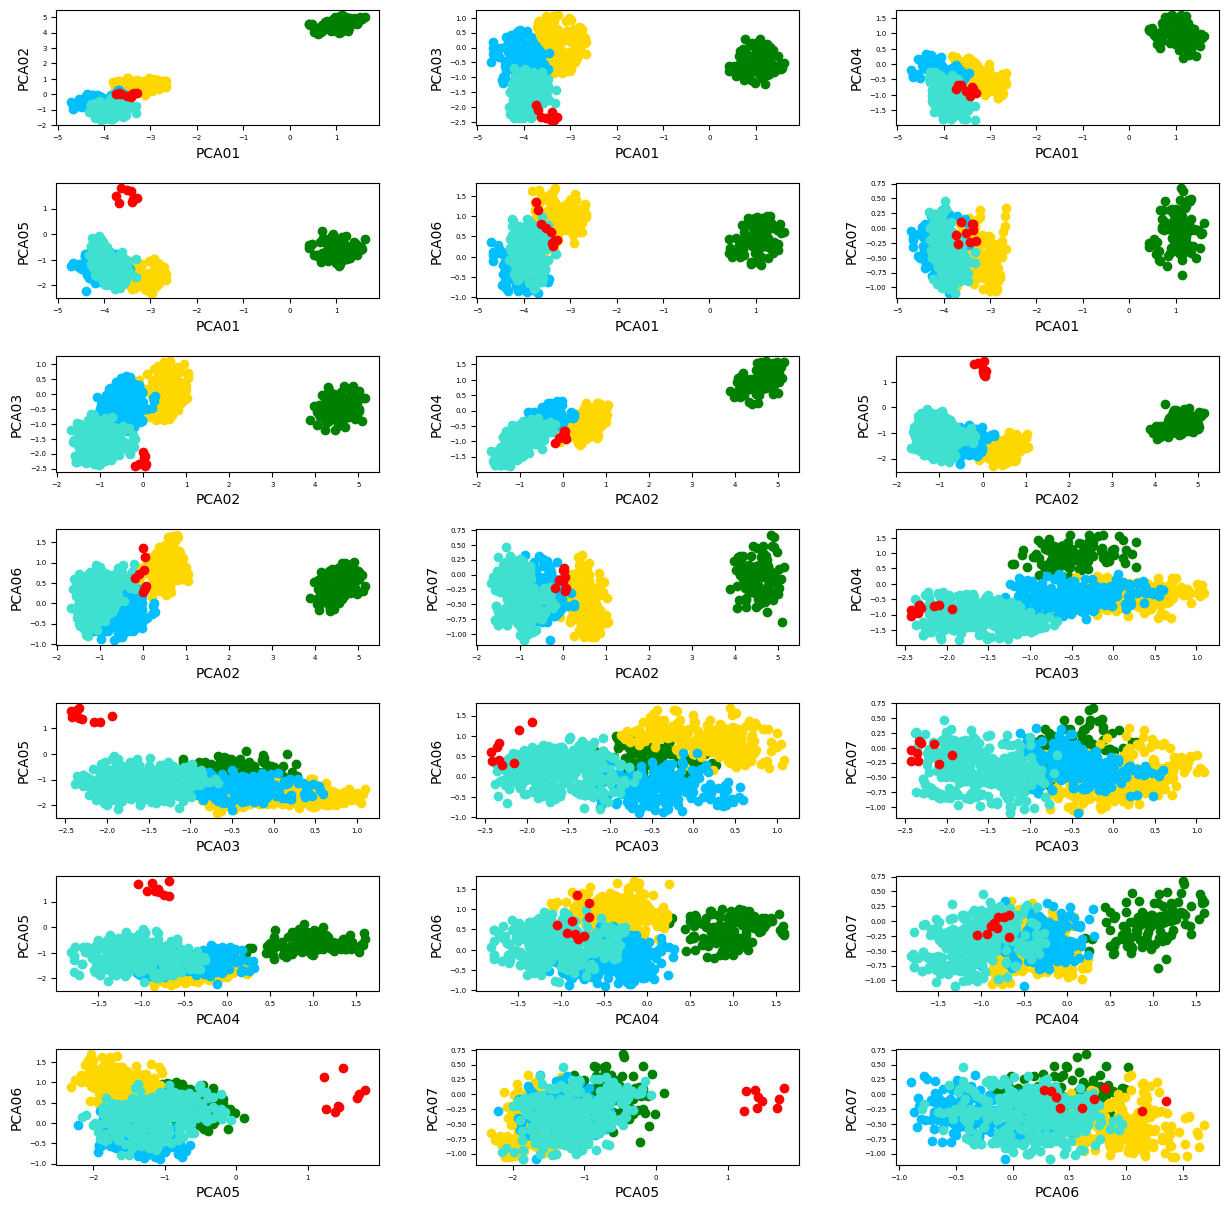

In [25]:
res_optics_dbscan_100 = pca_comb_plot(labels_100, "optics_label_100")

In the following clustering, eps=0.9 and minimum sample=150, "green" cluster is clearly separated from the rest of other clusters. The "gold" and "deepskyblue" clusters are always closely stick to each other in all dimensions. 

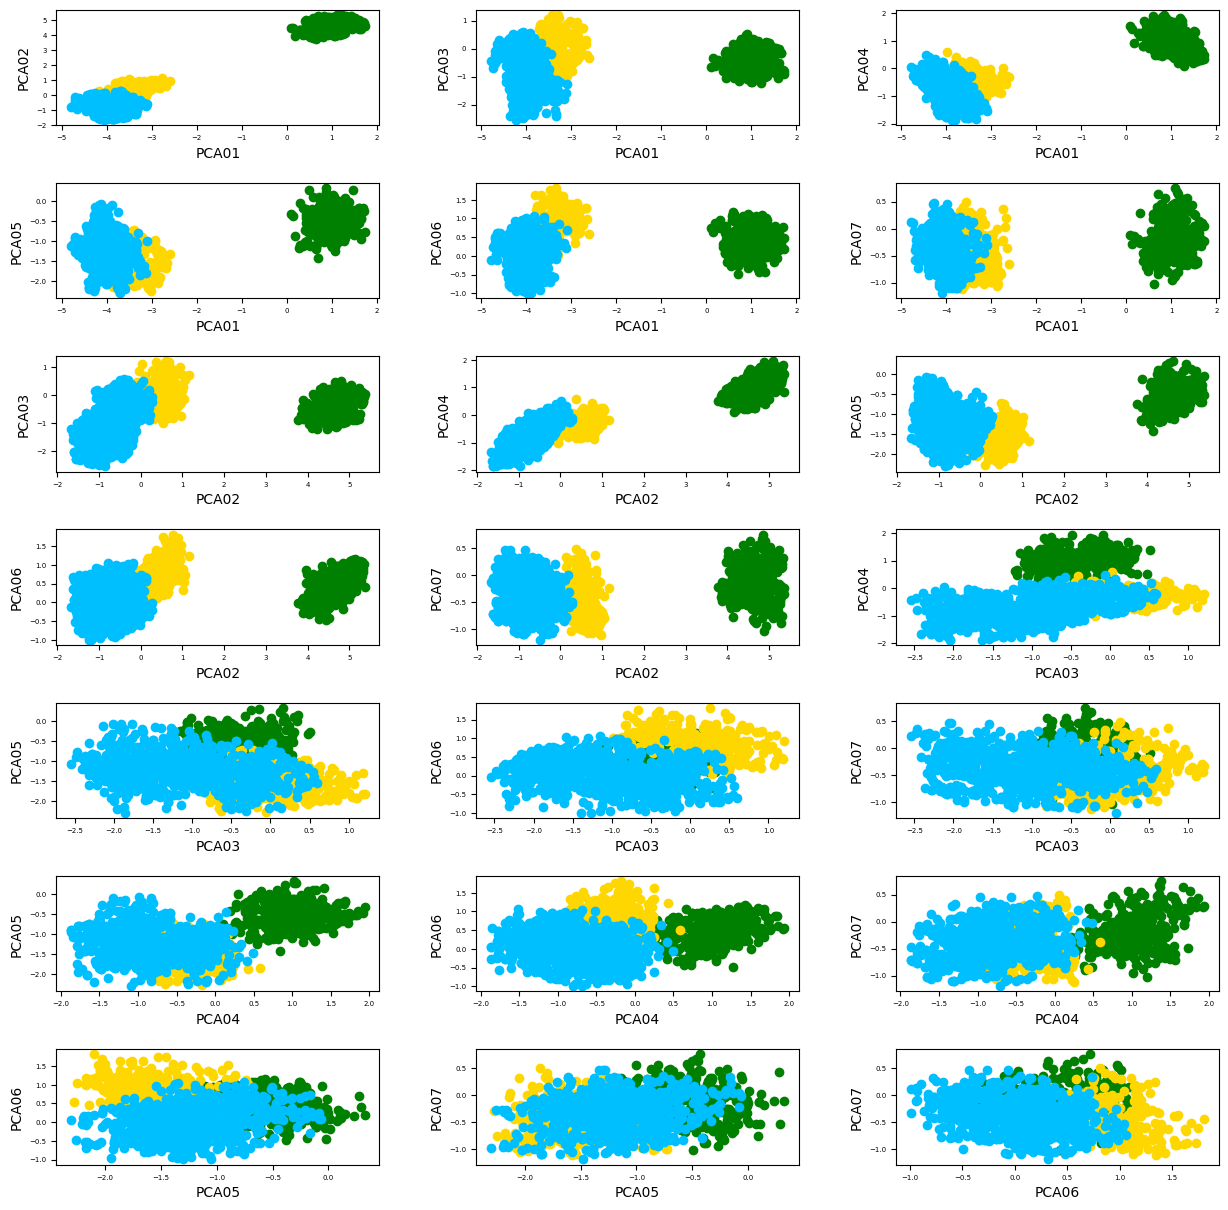

In [26]:
res_optics_dbscan_150 = pca_comb_plot(labels_150, "optics_label_150")

In the following clustering, eps=1.0 and minimum sample=200, "deepskyblue" cluster is clearly separated from the rest of other clusters. The "gold" and "green" clusters are always closely stick to each other in all dimensions. 

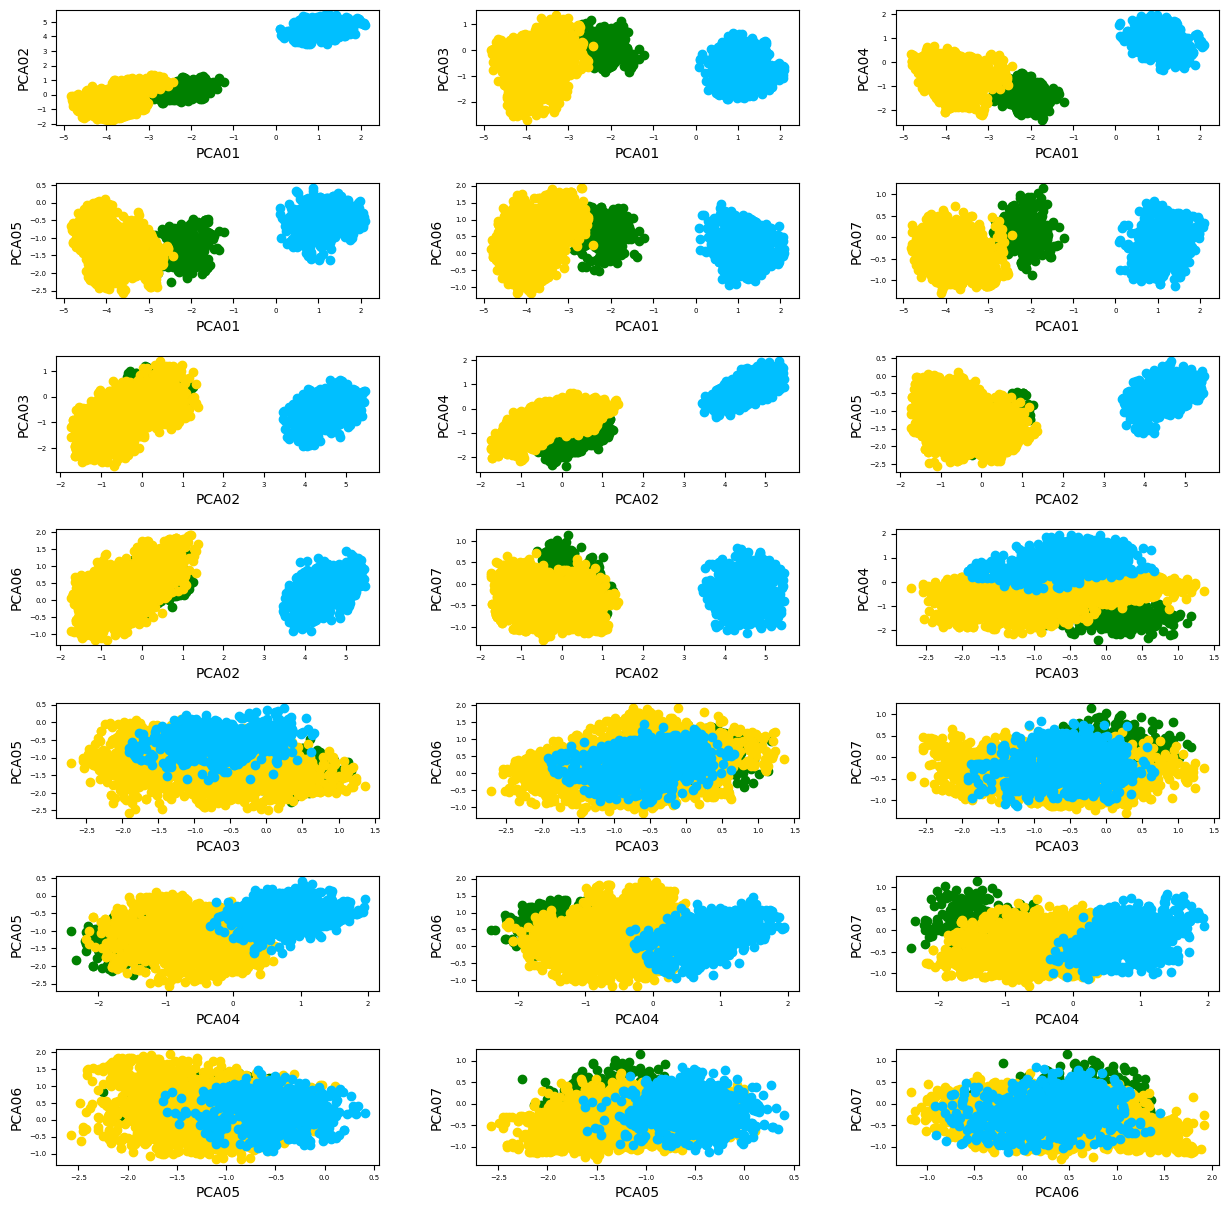

In [27]:
res_optics_dbscan_200 = pca_comb_plot(labels_200, "optics_label_200")

---
The following tables present the mean values of features in each cluster. Values are standardized values, not original values.

clustering_100 = clustering with eps=0.8 and minimum sample=100  
clustering_150 = clustering with eps=0.9 and minimum sample=150  
clustering_200 = clustering with eps=1.0 and minimum sample=200

In [28]:
res_optics_dbscan_100.iloc[:, 3:].groupby(by='optics_label_100').mean(numeric_only=True)

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,latitude,longitude,eqDepth,eqMagnitude,PCA01,PCA02,PCA03,PCA04,PCA05,PCA06,PCA07,optics_label_150,optics_label_200
optics_label_100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1.389567,-0.902277,-1.458248,-0.227196,0.034150,-0.577408,0.211781,-0.631308,-0.484059,-0.220919,-0.788857,-0.271751,-0.430227,1.741362,1.513155,1.134688,1.138312,1.737357,-0.830197,-0.837602,-0.886760,-0.935929,-0.929645,-0.930662,-0.929818,-0.935596,38.533517,142.818675,28.383333,7.575833,1.050945,4.573728,-0.481743,0.966543,-0.634678,0.491742,-0.050613,0.000000,2.000000
1,1.147740,1.095124,1.341985,-0.257440,-0.091983,-0.408058,0.239855,-0.578771,-0.663069,-0.675628,0.553327,-0.517591,-0.572355,0.652557,0.819429,0.379001,0.402987,0.219601,0.993398,1.031964,1.091898,1.161394,-0.929645,-0.930662,-0.929818,-0.935596,32.168630,138.056579,57.968504,6.567323,-3.261637,0.554490,0.125277,-0.406371,-1.674223,0.947267,-0.515817,0.874016,0.905512
2,1.413101,0.495741,1.407024,-0.198849,-0.091983,-0.294566,0.281541,-0.262144,-0.437899,-0.672802,0.868948,-0.321640,0.526394,0.090124,-0.091119,0.448001,0.453114,-0.205231,1.453181,1.506688,1.594228,1.693899,-0.929645,-0.930662,-0.929818,-0.935596,32.194661,140.704821,36.518349,6.400000,-4.026813,-0.454630,-0.450631,-0.377340,-1.352350,-0.259110,-0.337848,1.972477,1.000000
3,1.426915,0.298271,1.359931,-0.250062,-0.091983,-0.231833,0.297014,-1.037371,-0.643972,-0.745013,-0.636947,-0.446445,0.865141,-0.606744,-0.810149,0.111548,0.106186,-0.829457,1.536102,1.591080,1.683642,1.788744,-0.929645,-0.930662,-0.929818,-0.935596,31.967795,137.875016,36.570667,6.844267,-3.957077,-1.058739,-1.640675,-1.067641,-1.165240,0.170157,-0.383503,1.992000,1.000000
4,0.944484,-0.484213,0.692275,-0.269716,-0.091983,0.865422,0.567641,-1.309652,-0.768766,-0.844623,-0.911923,0.828952,1.380878,0.203951,-0.054974,-1.166789,-1.165753,-0.082444,1.117179,1.171406,1.239468,1.317933,-0.929645,-0.930662,-0.929818,-0.935596,31.001000,128.873000,12.000000,6.700000,-3.487156,-0.002991,-2.262786,-0.822227,1.487805,0.672066,-0.080609,-1.000000,-1.000000


In [29]:
res_optics_dbscan_150.iloc[:, 3:].groupby(by='optics_label_150').mean(numeric_only=True)


,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,latitude,longitude,eqDepth,eqMagnitude,PCA01,PCA02,PCA03,PCA04,PCA05,PCA06,PCA07,optics_label_100,optics_label_200
optics_label_150,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1.397613,-0.913571,-1.469352,-0.230013,0.107913,-0.410268,0.253004,-0.555456,-0.444883,-0.124720,-0.838338,-0.277746,-0.428389,1.836897,1.615753,1.121696,1.125284,1.813563,-0.783976,-0.786343,-0.832438,-0.878315,-0.929645,-0.930662,-0.929818,-0.935596,38.535072,142.708349,29.228916,7.197289,0.986680,4.650277,-0.410836,1.026257,-0.510427,0.458817,-0.156573,-0.638554,1.963855
1,1.162398,1.070188,1.348357,-0.236232,-0.091983,-0.450282,0.229627,-0.565514,-0.619952,-0.667349,0.468979,-0.422796,-0.531806,0.671464,0.823797,0.375842,0.398673,0.240717,1.017431,1.057689,1.119123,1.190224,-0.929645,-0.930662,-0.929818,-0.935596,31.773417,138.037282,90.051780,6.591586,-3.324284,0.552119,0.107226,-0.328387,-1.637793,0.936617,-0.489579,0.540453,0.980583
2,1.420134,0.416111,1.389120,-0.213056,-0.091983,-0.249632,0.292624,-0.709284,-0.546687,-0.700575,-0.047150,-0.346692,0.663649,-0.290178,-0.483772,0.227212,0.222826,-0.542645,1.510175,1.564901,1.655866,1.759284,-0.929645,-0.930662,-0.929818,-0.935596,32.017749,138.989075,40.455189,6.669811,-4.007405,-0.793853,-1.104721,-0.775646,-1.223030,0.037806,-0.374118,1.528302,1.000000


In [30]:
res_optics_dbscan_200.iloc[:, 3:].groupby(by='optics_label_200').mean(numeric_only=True)


,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,latitude,longitude,eqDepth,eqMagnitude,PCA01,PCA02,PCA03,PCA04,PCA05,PCA06,PCA07,optics_label_100,optics_label_150
optics_label_200,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.674476,0.982966,0.889843,-0.257589,-0.091983,-0.433659,0.245346,-0.416787,-0.608109,-0.618181,0.768426,-0.478997,-0.621376,0.007402,0.105924,-0.071414,-0.020753,-0.397649,0.484707,0.501798,0.530830,0.566798,-0.929645,-0.930662,-0.929818,-0.935596,37.668655,142.479273,22.497326,6.653743,-2.122756,0.294369,0.117756,-1.413207,-1.251939,0.612077,0.118137,-1.000000,-1.000000
1,1.345612,0.605533,1.377822,-0.198923,-0.091983,-0.302327,0.276592,-0.696806,-0.564842,-0.665374,-0.027365,-0.308421,0.314076,0.014424,-0.086301,0.247303,0.252184,-0.293016,1.374439,1.425257,1.508093,1.602549,-0.929645,-0.930662,-0.929818,-0.935596,31.768209,138.671961,55.101047,6.681728,-3.828493,-0.378494,-0.783259,-0.613628,-1.300512,0.347759,-0.418843,0.381152,0.652356
2,-1.402900,-0.955661,-1.489219,-0.233935,0.115404,-0.197314,0.305527,-0.607015,-0.474832,-0.165559,-0.837346,-0.279122,-0.414781,1.663201,1.424661,1.144007,1.147602,1.613126,-0.785702,-0.791690,-0.838074,-0.884241,-0.929645,-0.930662,-0.929818,-0.935596,38.438969,142.504606,30.377279,7.145302,1.073515,4.494450,-0.606904,0.802702,-0.523385,0.301449,-0.190851,-0.831697,-0.539972


The cluster 0 (green) in clustering_100, cluster 0 (green) in clustering_150, and cluster 2 (deepskyblue) in clustering_200 are the "stand out cluster". High "eqMagnitude", with over 7 units, are clustered to this segment. The temperature, relativehumidity, dewpoint and soil temperature values are all negative, while other clusters have positive values in those features. Secondly, wind speed and wind direction (degree) are also highest among all clusters. 

It is concluded that a pattern is extracted in the above clustering, 30 days before a 7 magnitude earthquake, cold weather with strong wind happened, which could be the sign of the hazard. 

---
The three OPTICS based DBSCAN results show that, beside the "stand out cluster", other clusters might be overlapped, having ambiguous assignment during clustering. Therefore, Gaussian Mixture Model would be applied on the previous clustering results. ("noises" and "stand out clusters" instances would be excluded.)

In a high dimension dataset, it is not easy to detemine if data distributed in gaussian shape. However, the number of instances over 30 implied central limited theorem could be applied, and the data is the results from OPTICS, which has a structure of more dense in "center" and less dense away from "center", would increase the probability that clusters are in gaussian shape. Although these are not 100% true, no other obvious evidence shows that the clusters are not gaussian shape. Therefore, Gaussian Mixture Model is applied. 

Since the extracted clusters from the three clusterings in OPTICS based DBSCAN extraction are similar. Most of the clustered instances in smaller eps and min_samples are included in a clustering with larger eps and min_samples, the clustering with more instances remaining would be selected for the further analysis that can maintain the generalized effect of the model. Too few instances might undermine the reliability of the clustering model. 

In [31]:
res_optics_200_no2 = res_optics_dbscan_200[(res_optics_dbscan_200['optics_label_200']!=2)]

In [41]:
# Function to fit data into GMM and plot the results in different PCA combination dimensions

from sklearn.mixture import GaussianMixture

def gm_plot(df, n_component):

    # fit data to GMM
    gm = GaussianMixture(n_components=n_component, 
                         init_params='k-means++',
                         random_state=73).fit(df[li_pca])

    gm_label = gm.predict(df[li_pca])

    # Insert cluster label to dataframe
    pd.options.mode.chained_assignment = None
    df['gm_label'] = gm_label

    color_name = ['green', 'gold', 'deepskyblue', 'turquoise',
                  'olive', 'magenta', 'orangered', 'crimson', 
                  'chartreuse', 'steelblue', 'yellow', 'lemonchiffon']

    # PCA combination subplots
    fig, axs = plt.subplots(7, 3, figsize=(15, 15))
    axe = axs.ravel()
    
    for i, com in enumerate(itertools.combinations(li_pca, 2)):
        for j in range(n_component):
            axe[i].scatter(df[df['gm_label']==j][com[0]], df[df['gm_label']==j][com[1]], c=color_name[j])
            axe[i].set_xlabel(com[0], fontsize=10)
            axe[i].set_ylabel(com[1], fontsize=10)
            axe[i].tick_params(axis='both', labelsize=5)
    
    plt.subplots_adjust(wspace=0.3,
                        hspace=0.5)
    return df, gm, gm_label

Evaluation on the GMM performance with different number of components using BIC

(array([12500., 13000., 13500., 14000., 14500., 15000., 15500.]),
 [Text(0, 12500.0, '12500'),
  Text(0, 13000.0, '13000'),
  Text(0, 13500.0, '13500'),
  Text(0, 14000.0, '14000'),
  Text(0, 14500.0, '14500'),
  Text(0, 15000.0, '15000'),
  Text(0, 15500.0, '15500')])

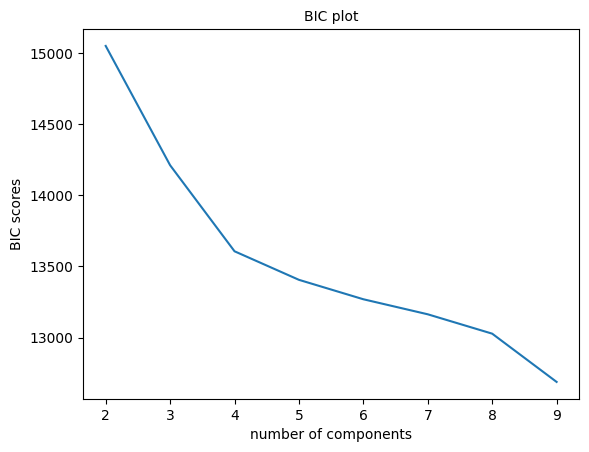

In [51]:
def gmm_ev(df, n_component):

    gm = GaussianMixture(n_components=n_component, 
                         init_params='k-means++',
                         random_state=73).fit(df[li_pca])
    
    return gm.bic(df[li_pca])

bic_score = []
for n_c in range(2, 10):

    bic_score.append(gmm_ev(res_optics_200_no2, n_c))

plt.plot(range(2, 10), bic_score)
plt.title("BIC plot", fontsize=10)
plt.xlabel("number of components", fontsize=10)
plt.ylabel("BIC scores", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

According to the BIC result, 4 components is suggested. The following would compare the clustering results of GMM with 2 components and GMM with 4 components on the same data.

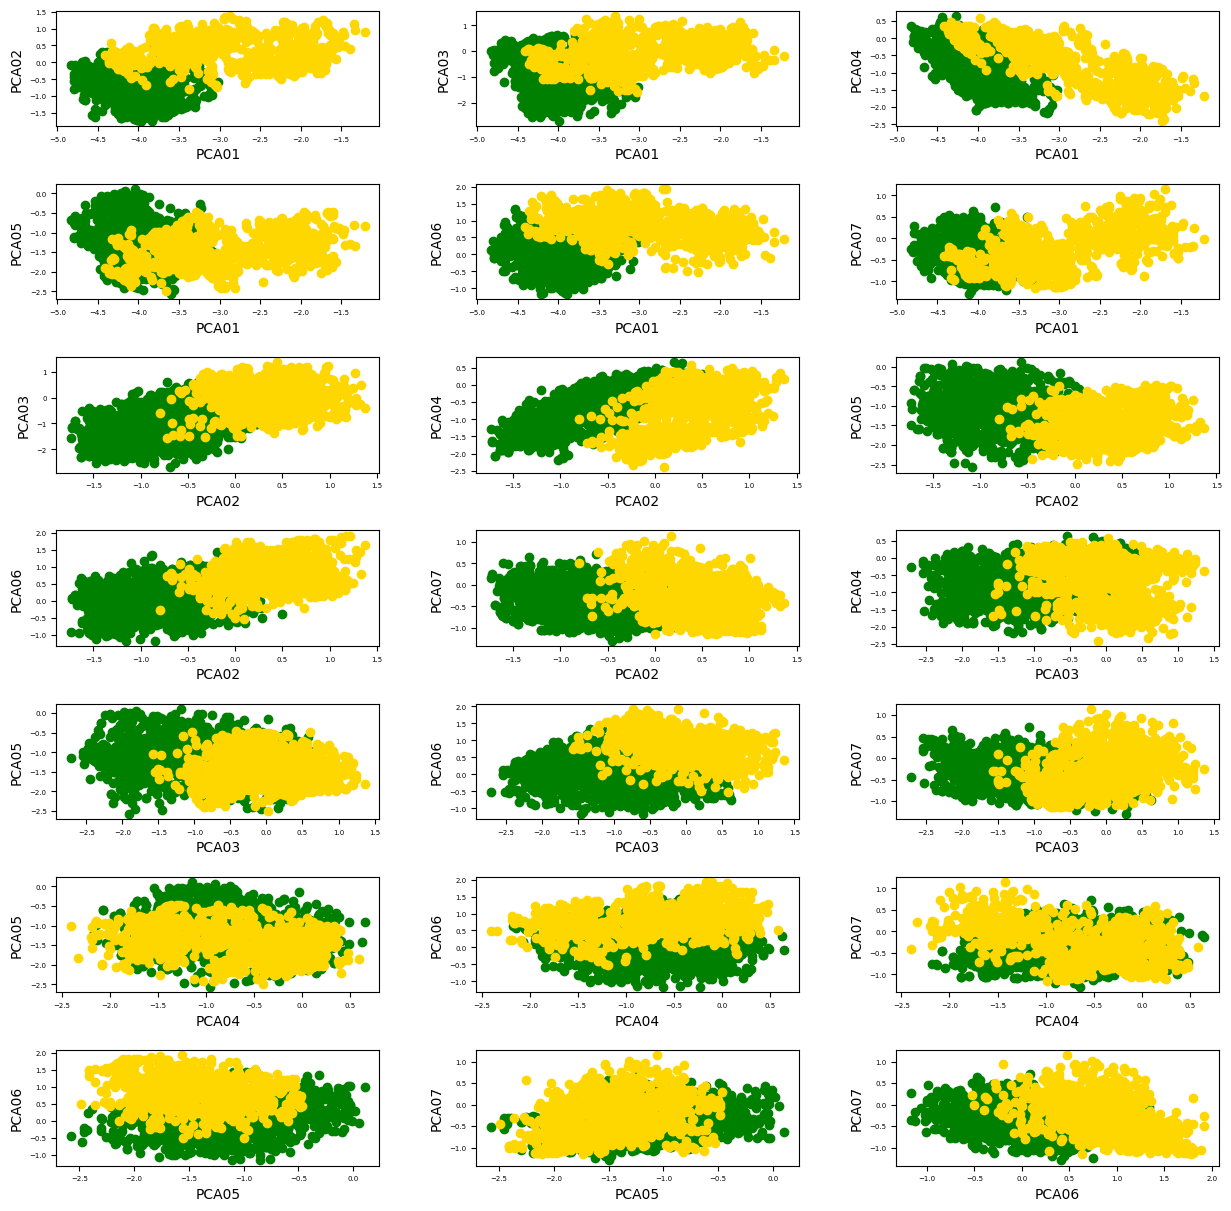

In [33]:
# GMM result with 2 components
res_optics_200_no2, gm_200, gm_label_200 = gm_plot(res_optics_200_no2, 2)

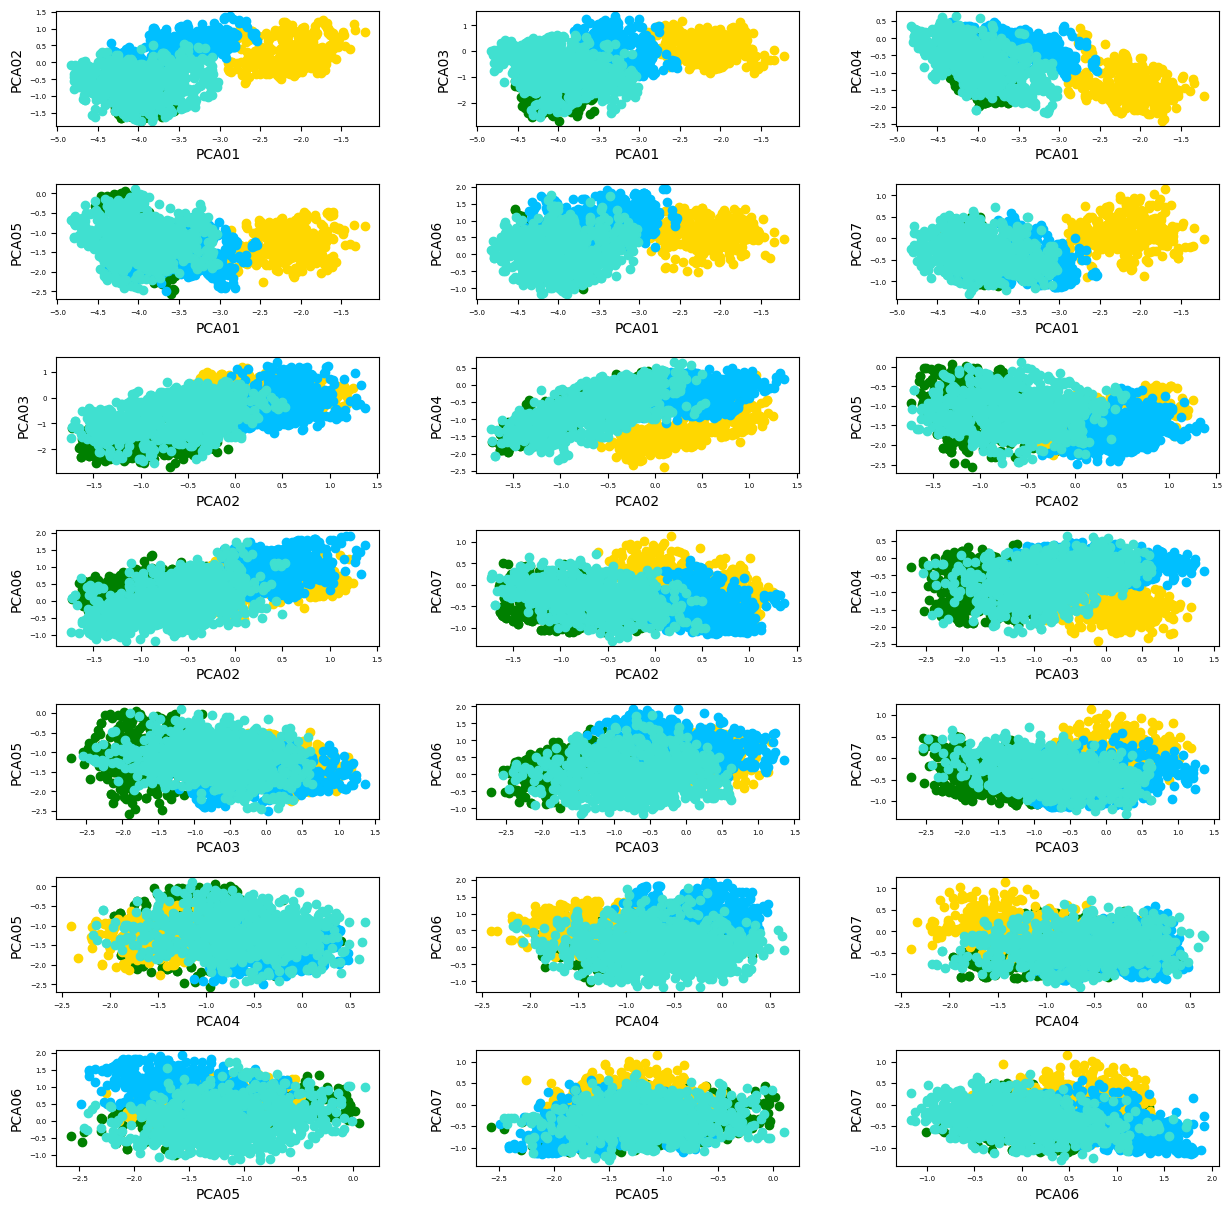

In [54]:
# GMM result with 4 components
res_optics_200_no2, gm_200, gm_label_200 = gm_plot(res_optics_200_no2, 4)

Although "4 components" is suggested in BIC score plot, "2 components" is applied. The team decided a density based clustering would be in higher priority. In this case, GMM only plays an assiting role as a soft clustering for the OPTICS based result. Also, according to the above plotting, the result with 4 components do not show a better clustering in 2 dimensions. (It could be a better clustering in other higher dimensions.)

In [34]:
# GMM clustering results with 2 components
res_optics_200_no2.iloc[:, 3:].groupby(by='gm_label').mean(numeric_only=True)

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,pressure_msl,surface_pressure,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,latitude,longitude,eqDepth,eqMagnitude,PCA01,PCA02,PCA03,PCA04,PCA05,PCA06,PCA07,optics_label_100,optics_label_150,optics_label_200
gm_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.416513,0.429441,1.389844,-0.194960,-0.091983,-0.234134,0.296446,-0.692008,-0.538048,-0.664965,-0.079746,-0.284238,0.640489,-0.251068,-0.441754,0.196948,0.195413,-0.507364,1.508503,1.563089,1.653949,1.757247,-0.929645,-0.930662,-0.929818,-0.935596,31.943671,138.903114,42.336890,6.699390,-4.019284,-0.760391,-1.067735,-0.745768,-1.167973,0.059434,-0.372205,0.641768,0.932165,1.000000
1,0.991676,0.988447,1.173833,-0.226846,-0.091983,-0.444906,0.237770,-0.595539,-0.617657,-0.647767,0.349538,-0.406697,-0.486452,0.370082,0.467452,0.192638,0.223795,-0.043951,0.851135,0.883890,0.935193,0.995210,-0.929645,-0.930662,-0.929818,-0.935596,33.801709,139.824906,59.784979,6.647119,-2.914643,0.395888,-0.052588,-0.742923,-1.460723,0.838641,-0.275178,-0.502058,-0.361111,0.615226


The result indicated that "sign" of 6.6 unit earthquake magnitude can be classified as two segments. 

Firstly, two clusters are having close value in "eqMagnitude" but cluster 0 has shallower "eqDepth".  
Cluster 0 has higher temperature, lower relativehumidity_2m, lower soil temperature, slower wind speed, higher vapor pressure, and smaller cloudcover_high.  
The rest of the feature values are closed between two clusters.  
Two clusters have the same soil moisture level and snowfall, and the wind direction_10m, cloudcover_mid, and surface pressure are close among two clusters. 

---
# Task 8 Conclusions and Future Work
---

The data science team was assigned to conduct clustering in the first stage of the project, in an attempt to identify hidden clusters in historical weather data. 

Data was first fit to PCA in order to reduce the number of features put into clustering.

Two-stage clustering was applied to the features generated from PCA results, OPTICS based DBSCAN and Gaussian Mixture Model (GMM). From the first stage, a strong earthquake magnitude cluster with relatively lower temperature and strong wind is extracted. Then, two more clusters were extracted through GMM that they have different in various features which could not generalize, for instance, one cluster has high temperature but lower soil temperature. 

With the clustering results, the team could use the extracted cluster results as labeled data for the next stage of forecasting.  

Some concerns should be taken into account. The data collected is 30-day hourly data before each earthquake. The clusters characteristics could be coincidents but not the "sign" for the earthquakes. In order to prove the approaches, the team is suggested to collect historical data with the similar patterns identified in the clusterings and see if any magnitude of earthquakes happened in a 30-day range. 

Hierarchical DBSCAN would also be worth trying, since during the first clustering analysis three different minimum samples were fit and the results showed that clusters extracted in clustering with smaller eps and minimum sample might already include in the clusters extracted in clustering with larger eps and minimum sample. 

Evaluation on the performance and the choices of hyperparameters of both two clusterings are the most challenging tasks. In this project, the challenges are handled by loop different arbitrary values to compare the performance of each clustering. To improve the evaluations could try more other clustering algorithms and other arbitrary values for hyperparameters for comparisons. 